# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('nasdaq.csv', sep = ";")
dataset = dataset.reset_index()
dataset = dataset.drop(["Date"], axis = 1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

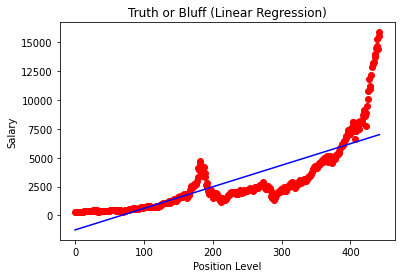

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Prediction (Linear Regression)')
plt.xlabel('Months since 1985')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results

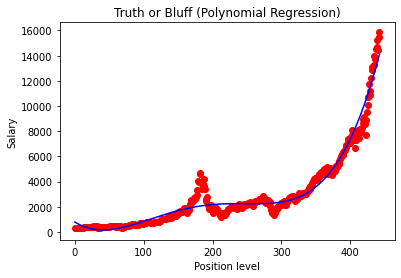

In [12]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Prediction(Polynomial Regression)')
plt.xlabel('Months since 1985')
plt.ylabel('Price')
plt.show()

In [41]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))

In [44]:
y_true = y

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

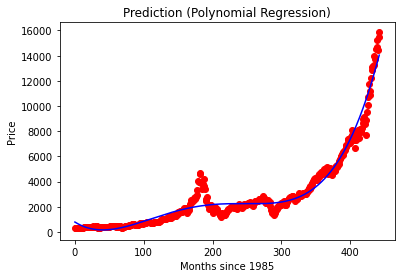

In [33]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Prediction (Polynomial Regression)')
plt.xlabel('Months since 1985')
plt.ylabel('Price')
plt.show()

## Predicting a new result with Linear Regression

In [15]:
lin_reg.predict([[500]])

array([8080.48445053])

## Predicting a new result with Polynomial Regression

In [32]:
lin_reg_2.predict(poly_reg.fit_transform([[450]]))

array([15826.44037292])

In [27]:
dataset["Adj Close"]

0        278.700012
1        284.200012
2        279.200012
3        280.600006
4        290.799988
           ...     
438    14672.679688
439    15259.240234
440    14448.580078
441    15498.389648
442    15860.959961
Name: Adj Close, Length: 443, dtype: float64

In [45]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.9626874525509113